##Importing Libs

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
df = pd.read_pickle("/content/drive/MyDrive/train_data.pkl")
type(df)                            # a dictionary 
X = np.array(df['X'])
X = X.T
Y = np.array(df["y"])
X = np.divide(X, 255) #normalized

# to split data into test & train dataset
X_train = X[ : , :50000]
X_test = X[ : , 50000: ]
Y_train = Y[ : 50000, : ].reshape(1,50000)
Y_test = Y[50000 : , : ].reshape(1,10000)

In [3]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [46]:
print(X_train.shape, Y_train.shape)

(784, 50000) (50000,)


##Loading random 16 data samples

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


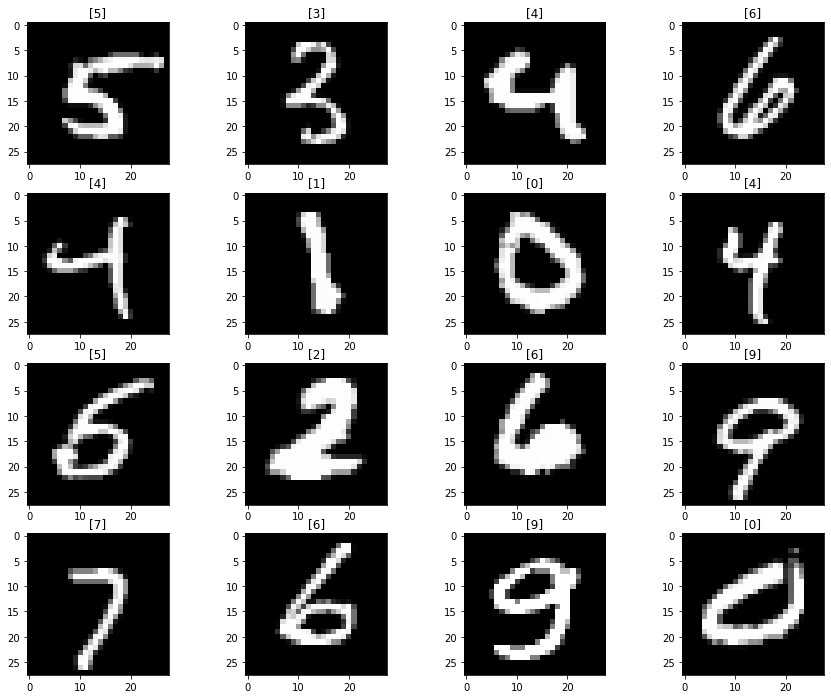

In [121]:
# displaying random 16 numbers
import random
rand = random.sample(range(0,60000), 16)
#print(rand)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,12))
ax = axs.ravel()

for i, j in zip(rand, np.arange(16)):
  image = X[ : ,i, None]
  image = image.reshape((28,28))*255
  ax[j].set_title(Y[i])
  plt.gray()
  ax[j].imshow(image, interpolation = "nearest")
plt.show()

##Making Custom Dataset

In [9]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

class CustomTextDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        image = self.images[:,idx]
        image = torch.from_numpy(image)
        label = np.array(label)
        label = torch.from_numpy(label)
        return image, label

In [20]:
train_data = CustomTextDataset(X_train, Y_train)
test_data = CustomTextDataset(X_test, Y_test)

In [21]:
train_df = DataLoader(train_data, batch_size=1000, shuffle=True)
test_df = DataLoader(test_data, batch_size=1000, shuffle=True)

##Loading an example

torch.Size([784])


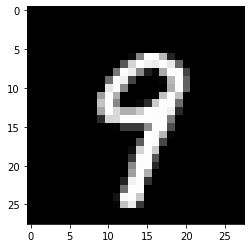

9


In [47]:
example = CustomTextDataset(X_train, Y_train)
image, label = example[299]
print(image.shape)
image = image.reshape((28,28))*255
plt.gray()
plt.imshow(image, interpolation = "nearest")
plt.show()
print(label.numpy())

In [ ]:
pd.DataFrame(test_df)

In [23]:
#hyper-parameters
epochs = 10
output_class = 10
learning_rate = 0.001
input_size = 784
hidden_layer = 100

##Model

In [24]:
class DigitRecognizer(nn.Module):
  def __init__(self, input_size, hidden_layer, ouput_class):
    super(DigitRecognizer, self).__init__()
    self.input = nn.Linear(in_features = input_size, out_features = hidden_layer)
    self.relu_1 = nn.ReLU()
    self.hidden_1 = nn.Linear(in_features = hidden_layer, out_features = hidden_layer)
    self.relu_2 = nn.ReLU()
    self.hidden_2 = nn.Linear(in_features = hidden_layer, out_features = hidden_layer)
    self.relu_3 = nn.ReLU()
    self.output = nn.Linear(in_features = hidden_layer, out_features = output_class)
  
  def forward(self, x):
    model = self.input(x)
    model = self.relu_1(model)
    model = self.hidden_1(model)
    model = self.relu_2(model)
    model = self.hidden_2(model)
    model = self.relu_3(model)
    model = self.output(model)

    return model

In [25]:
model = DigitRecognizer(input_size, hidden_layer, output_class)
repr(model)

'DigitRecognizer(\n  (input): Linear(in_features=784, out_features=100, bias=True)\n  (relu_1): ReLU()\n  (hidden_1): Linear(in_features=100, out_features=100, bias=True)\n  (relu_2): ReLU()\n  (hidden_2): Linear(in_features=100, out_features=100, bias=True)\n  (relu_3): ReLU()\n  (output): Linear(in_features=100, out_features=10, bias=True)\n)'

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
device

device(type='cpu')

In [31]:
model = model.to(device)

##Training Loop

In [ ]:
for epoch in range(epochs):
  for step, (images, labels) in enumerate(train_df):
    
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    #print(images)
    #print(labels)

    outputs = model(images.float())
    #print(outputs.size())
    #print(labels.size())
    
    loss = criterion(outputs, labels)
    #print(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print("Epoch: {}/{}, Step: {}/{}, loss: {:.4f}".format(epoch, epochs, step, len, loss.item()))

##Testing Loop

In [99]:
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     for images, labels in test_df:
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images.float())
         # max returns (value ,index)
         predicted = outputs.argmax(axis=1)
         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item()

In [100]:
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {acc} %') 

Accuracy of the network on the 10000 test images: 96.74 %


In [123]:
from google.colab import files
torch.save(model, 'ass_2.pt')
files.download('ass_2.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>